<a href="https://colab.research.google.com/github/martins-jean/Handwritten-Poem-AI-Decoder/blob/main/Risk_Factor_AI_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

<p align="justify"> The goal of this project is to understand the factor exposure and the idiosyncratic risk of a common stock.

**STEP** 1️⃣ <br>
DATA COLLECTION

In [1]:
# STEP 1.1 - Import the necessary packages
# A good way to collect data in Python is by using the pandas data reader

# We import this package because it has connections to many financial datasets
# We need the time series of stock returns and the same for the factor returns
import pandas_datareader

# We also import a plotting tool to visualize our data
# The advantage of Colab is that common python packages are already included so there is no installation requirement
import matplotlib.pyplot as plt

In [2]:
# STEP 1.2 - Discovering what data is available in the Kenneth French library
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
# STEP 1.3 - Establishing a start date
# We want to go as far back as possible which is 1926
start = '1926-01-01'

In [4]:
# STEP 1.4 - Obtaining the datasets we shortlisted
# We will use the F-F_Research_Data_Factors which is based on the three factor model
# Beyond that, we will add the F-F_Momentum_Factor
# We specify what we want and how frequently we want it in the method below
# We know that daily factor returns are too noisy so we chose a monthly frequency
ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq = 'M', start = start).read()

**STEP** 2️⃣ <br>
DATA VISUALIZATION

In [5]:
# STEP 2.1 - Displaying the data to verify its content
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2022-08   -3.77  1.39  0.31  0.19
 2022-09   -9.35 -0.82  0.03  0.19
 2022-10    7.83  0.10  8.05  0.23
 2022-11    4.60 -3.40  1.39  0.29
 2022-12   -6.41 -0.64  1.36  0.33
 
 [1158 rows x 4 columns], 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.10 -10.34  2.15
 2020   23.66  13.17 -46.57  0.45
 2021   23.56  -3.92  25.57  0.04
 2022  -21.60  -6.79  25.85  1.43
 
 [96 rows x 4 columns], 'DESCR': 'F-F Research Data Factors\n-------

<p align='justify'> This is not exactly a dataframe and there are two things to point out here. Element 0 is indeed the dataframe and element 1 is something else.

In [6]:
# STEP 2.2 - Removing unecessary data
# Let's just get the dataframe of returns by selecting the element at index 0
ff_df = ff[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efc158f2550>,
      dtype=object)

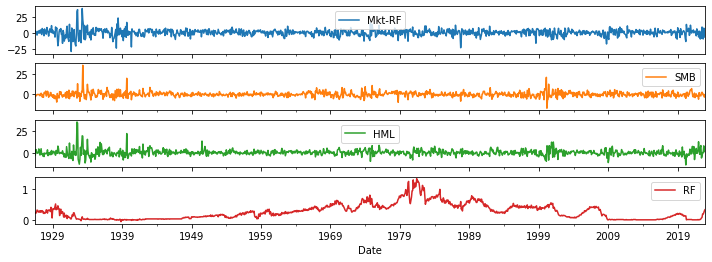

In [7]:
# STEP 2.3 - Plotting our data
# The data series seem to be there but there are quite noisy
ff_df.plot(subplots = True, figsize = (12, 4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efc15a6ee20>,
      dtype=object)

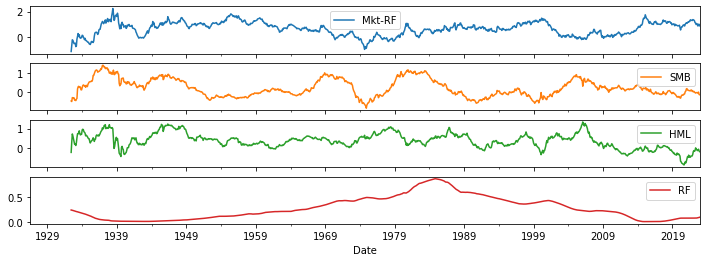

In [8]:
# STEP 2.4 - Reducing the noise by smoothing our data
# We use the rolling method with a 72 month rolling window average
# It gives us a much better view into what the factor dynamics are
ff_df.rolling(72).mean().plot(subplots = True, figsize = (12, 4))

<p align='justify'> We can see that the market factor and the size factor took a dip in the late 70s and later they have been moving inverse to each other. Size and value seem to be more positively correlated lately. These are the sort of insights you can draw from this first visualization to get a general idea. It is much clearer to look at these rolling averages rather than the previous month to month fluctuations we saw.

In [9]:
# STEP 2.5
# Now let's add to this the momentum factor
# We will combine some of the commands we executed before to get to the desired dataframe faster
ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq = 'M', start = start).read()[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efc137a1550>],
      dtype=object)

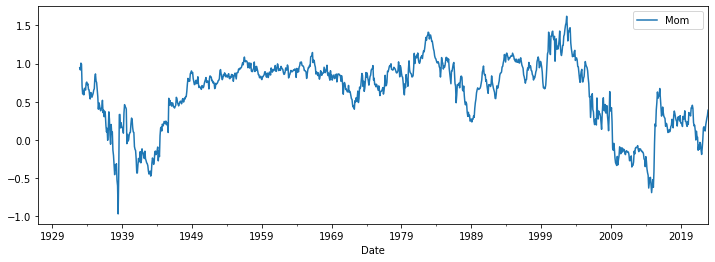

In [10]:
ff_mom_df.rolling(72).mean().plot(subplots = True, figsize = (12, 4))

<p align='justify'> We now run into the first data challenge of running a financial analysis project because we have a dataframe of three risk factors and another dataframe of one risk factor. How do we combine these two dataframes into one?

**STEP** 3️⃣ <br>
DATA PRE-PROCESSING

In [11]:
# STEP 3.1 - Merging the dataframes on a common identifier
# Let's see which identifier we should use by looking once more at our dataframes
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2022-08,-3.77,1.39,0.31,0.19
2022-09,-9.35,-0.82,0.03,0.19
2022-10,7.83,0.10,8.05,0.23


In [12]:
# We notice that the momentum dataframe starts later than ff_df
# The date identifier is going to let us map one to the other
ff_mom_df

,Mom
Date,
1927-01,0.36
1927-02,-2.14
1927-03,3.61
1927-04,4.30
1927-05,3.00
...,...
2022-08,2.10
2022-09,3.48
2022-10,3.89


In [13]:
# We perform an inner join on the common date identifier
# We start at the earliest date that exists in both dataframes (January 1927)
# We do not expect the date to occur more than once in either dataframes
import pandas as pd
ffac_merged_df = pd.merge(ff_df, ff_mom_df, on = 'Date', how = 'inner', sort = True, copy = True, indicator = False, validate = 'one_to_one')

In [14]:
# We verify the result of our merge
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2022-08,-3.77,1.39,0.31,0.19,2.10
2022-09,-9.35,-0.82,0.03,0.19,3.48
2022-10,7.83,0.10,8.05,0.23,3.89


<p align='justify'> Our risk factor data is now set up. Now we need to think abiut the data of the risk asset that we want to regress. <br> Let's say we want to get data for Apple as our risk asset.

In [15]:
# STEP 3.2 - Collecting the remaining data we need
# We will have to use a different database to get this data (Yahoo Finance)
# Unlike the risk factors, price series for equities have different fields such as open, high, low, close and the adjusted close
# We want a contiguous series based on months and we want to compare the returns on Apple and on the risk factors so we use the percent change method
AAPL_df = pandas_datareader.get_data_yahoo('AAPL', start = start)['Adj Close'].resample('M').ffill().pct_change()

RemoteDataError: ignored

<p align='justify'> Here we see that Python cannot seem to access this dataset and unfortunately this is another common data challenge if you work with financial data. From time to time, the technology will change in some way as on the database end as it is the case here. In this case, calling pandas_datareader simply won't work and thankfully there is a workaround which involves updating and overriding the original pandas_datareader with a fix. The bad news is that this fix does not exist in Google Colab so we have to take a detour to the python package manager to actually install it. Remember we can import things that are already installed but we first have to install things if they have not been installed previously in our IDE. As such, we will get a package called yfinance.

In [16]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
# Let's see if we can overcome the lxml issue
import yfinance as yf
yf.pdr_override()

In [21]:
AAPL_data = pandas_datareader.data.get_data_yahoo('AAPL', start = start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


<p align:'justify'> As it did not work, we followed the suggestion and restarted the runtime.

In [23]:
AAPL_data

Date
1980-12-31 00:00:00-05:00         NaN
1981-01-31 00:00:00-05:00   -0.172163
1981-02-28 00:00:00-05:00   -0.061943
1981-03-31 00:00:00-05:00   -0.075475
1981-04-30 00:00:00-04:00    0.158162
                               ...   
2022-10-31 00:00:00-04:00    0.109551
2022-11-30 00:00:00-05:00   -0.033027
2022-12-31 00:00:00-05:00   -0.122273
2023-01-31 00:00:00-05:00    0.110521
2023-02-28 00:00:00-05:00    0.045256
Freq: M, Name: Adj Close, Length: 507, dtype: float64

In [24]:
# We create a dataframe object from the Apple data
AAPL_df = AAPL_data.to_frame()

In [25]:
AAPL_df

,Adj Close
Date,
1980-12-31 00:00:00-05:00,NaN
1981-01-31 00:00:00-05:00,-0.172163
1981-02-28 00:00:00-05:00,-0.061943
1981-03-31 00:00:00-05:00,-0.075475
1981-04-30 00:00:00-04:00,0.158162
...,...
2022-10-31 00:00:00-04:00,0.109551
2022-11-30 00:00:00-05:00,-0.033027
2022-12-31 00:00:00-05:00,-0.122273


<p align='justify'> Now we need to think about how we want to merge the newly created dataframe with our previous risk factors dataframe. We could specify the data of separate dataframes into a regression model but it is better to have the same number of observations in both our y vector which to say Apple returns and our x matrix which is to say the risk factors returns. We see that it is not going to be the case because the Apple series starts in 1980 and our risk factor series starts back in 1927. We might want to hedge against the possibility that some month is missing somewhere so it's easier first to make sure that everything is merged, the dates are unique and then run a regression on that single dataframe. The other thing we notice is that our date index for Apple looks a little different as we see the day also, not just the year and the month.

In [26]:
AAPL_df.index.dtype

datetime64[ns, America/New_York]

In [27]:
# 3.3 - Merging our two dataframes
# We see that the data types are different and this can cause problems
ffac_merged_df.index.dtype

period[M]

In [35]:
# We have to change the index on both dataframes which is our next data challenge
# We cannot directly change the data type so we have to use an intermediary step
# We will create a date from a string and then format it as we want
AAPL_df['str_date'] = AAPL_df.index.astype(str)
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m')

KeyError: ignored